In [9]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Data Preprocessing

In [11]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=20000)

In [12]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [13]:
X_train.shape

(25000,)

In [14]:
#padding cause not all inputs are of the same length. the data set has words encoded as numbers, tokenization and bag of words model
X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)

In [15]:
X_train.shape, X_test.shape

((25000, 100), (25000, 100))

## Building the model

In [36]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(100,)),
    tf.keras.layers.Embedding(input_dim=20000, output_dim=128),
    tf.keras.layers.LSTM(units = 64, activation='tanh'),
    tf.keras.layers.Dense(units =1, activation='sigmoid')
])

In [37]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,609,473 (9.95 MB)

 Trainable params: 2,609,473 (9.95 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(optimizer='rmsprop',loss= 'binary_crossentropy',metrics=['accuracy'])

In [40]:
history = model.fit(X_train, y_train,batch_size=64, epochs = 5, validation_data=(X_test, y_test))

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9786 - loss: 0.0669 - val_accuracy: 0.8450 - val_loss: 0.5522
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.9837 - loss: 0.0506 - val_accuracy: 0.8355 - val_loss: 0.6549
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.9885 - loss: 0.0370 - val_accuracy: 0.8435 - val_loss: 0.6853
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9907 - loss: 0.0330 - val_accuracy: 0.8411 - val_loss: 0.7391
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9925 - loss: 0.0271 - val_accuracy: 0.8338 - val_loss: 0.7548


In [28]:
y_pred = (model.predict(X_test)>0.5).astype('int32')

782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step


In [29]:
y_pred[10], y_test[10]

(array([1]), 1)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [31]:
confusion_matrix(y_test,y_pred)

array([[10351,  2149],
       [ 1858, 10642]], dtype=int64)

In [32]:
accuracy_score(y_test, y_pred)

0.83972

## Learning_curve

In [33]:
def learning_curve(history, epoch):

    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc = 'upper left')
    plt.show()

    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc = 'upper left')
    plt.show()

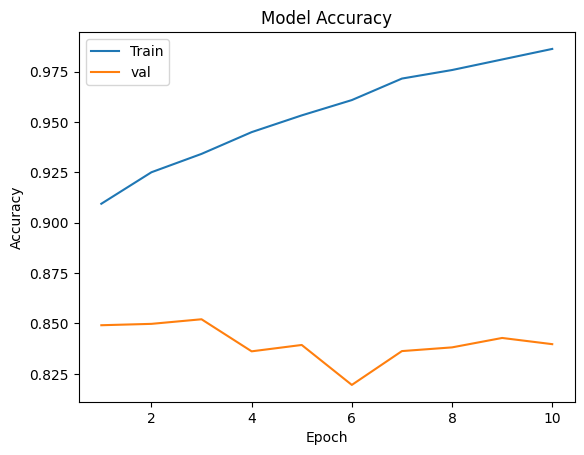

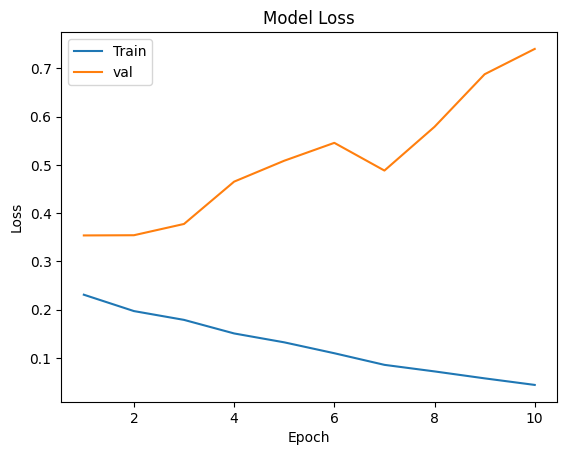

In [35]:
learning_curve(history, 10)